# ER Pipeline - Pandas - Moritz Wassmer - 0467748

In [1]:
#pip install Levenshtein
import pandas as pd
from tqdm import tqdm

from data_prep import parse_text

from params import *

## 1) Data Acquisition and Preperation

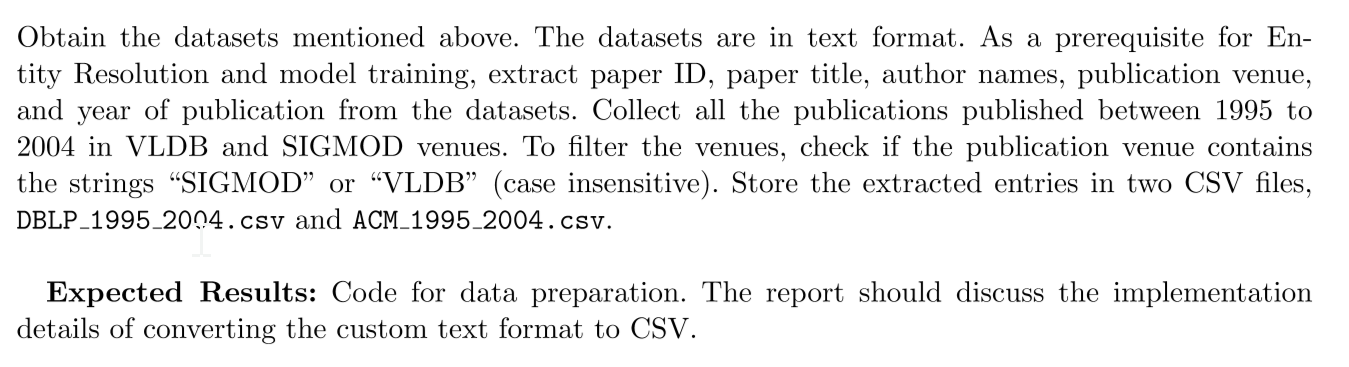

### a) Obtain raw data (List of strings)

In [2]:
with open(DLBP_PATH, 'r', encoding='utf-8') as file:
    rows_dblp = file.readlines()
with open(ACM_PATH, 'r', encoding='utf-8') as file:
    rows_acm = file.readlines()

View example rows

In [3]:
#rows_dblp[0:20]

In [4]:
#rows_acm[0:20]

### b) Parsing: Load raw data into dataframes

https://www.aminer.org/citation

In [5]:
dblp_df = parse_text(rows_dblp)
#dblp_df.head()

100%|██████████| 28028155/28028155 [00:43<00:00, 642747.51it/s] 


In [6]:
acm_df= parse_text(rows_acm)
#acm_df.head()

  0%|          | 0/24450329 [00:00<?, ?it/s]

100%|██████████| 24450329/24450329 [00:33<00:00, 737690.77it/s] 


Check types

In [7]:
dblp_df.dtypes

Title      string[python]
Authors    string[python]
Year                Int64
Venue      string[python]
Index      string[python]
dtype: object

In [8]:
acm_df.dtypes

Title      string[python]
Authors    string[python]
Year                Int64
Venue      string[python]
Index      string[python]
dtype: object

### c) Filter date: 1995 - 2004 & venue= SIGMOD, VLDB

In [9]:
filtered_dblp_df = dblp_df[(dblp_df['Year'] >= 1995) & (dblp_df['Year'] <= 2004) & dblp_df['Venue'].str.contains('sigmod|vldb', case=False)]
filtered_dblp_df.head()

,Title,Authors,Year,Venue,Index
215446,an initial study of overheads of eddies.,amol deshpande,2004,sigmod record,53e9a515b7602d9702e350a0
215453,engineering federated information systems: rep...,"stefan conrad, wilhelm hasselbring, uwe hohens...",1999,sigmod record,53e9b275b7602d9703d174f6
215454,information finding in a digital library: the ...,"tak w. yan, hector garcia-molina",1995,sigmod record,53e9a5beb7602d9702eea180
215456,editor's notes.,jennifer widom,1995,sigmod record,53e99800b7602d970200b618
215457,report on the 5th international workshop on th...,"hans-joachim lenz, panos vassiliadis, manfred ...",2003,sigmod record,53e9a718b7602d970304d814


In [10]:
filtered_acm_df = acm_df[(acm_df['Year'] >= 1995) & (acm_df['Year'] <= 2004) & acm_df['Venue'].str.contains('sigmod|vldb', case=False)]
filtered_acm_df.head()

,Title,Authors,Year,Venue,Index
2874,the next database revolution,jim gray,2004,sigmod '04 proceedings of the 2004 acm sigmod ...,5390972920f70186a0dfac85
2876,the role of cryptography in database security,ueli maurer,2004,sigmod '04 proceedings of the 2004 acm sigmod ...,5390972920f70186a0dfac86
2883,tree logical classes for efficient evaluation ...,"stelios paparizos, yuqing wu, laks v. s. laksh...",2004,sigmod '04 proceedings of the 2004 acm sigmod ...,5390972920f70186a0dfac8d
2884,adaptive stream resource management using kalm...,"ankur jain, edward y. chang, yuan-fang wang",2004,sigmod '04 proceedings of the 2004 acm sigmod ...,5390972920f70186a0dfac88
2885,holistic udafs at streaming speeds,"graham cormode, theodore johnson, flip korn, s...",2004,sigmod '04 proceedings of the 2004 acm sigmod ...,5390972920f70186a0dfac8a


### d) Missing values : drop rows

How many are missing? which columns?

In [11]:
filtered_acm_df.isnull().sum()

Title       0
Authors    56
Year        0
Venue       0
Index       0
dtype: int64

In [12]:
filtered_dblp_df.isnull().sum()

Title       0
Authors    23
Year        0
Venue       0
Index       0
dtype: int64

Drop rows

In [13]:
filtered_dblp_df = filtered_dblp_df.dropna()
filtered_acm_df = filtered_acm_df.dropna()

Drop duplicates

In [16]:
filtered_dblp_df = filtered_dblp_df.drop_duplicates(subset=['Index'], keep='first')
filtered_acm_df = filtered_acm_df.drop_duplicates(subset=['Index'], keep='first')

### e) CSV

In [17]:
filtered_dblp_df.to_csv(OUT_DBLP_FILTERED, index=False)
filtered_acm_df.to_csv(OUT_ACM_FILTERED, index=False)